<a href="https://colab.research.google.com/github/abdallah388687/Unsupervised-ML-Algorithms/blob/main/Credit_Card_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit card Dataset for clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CC GENERAL.csv')

## **EDA**

In [3]:
df1=df.copy()
df1.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Drop rows with null values and drop CUST_ID column

In [5]:
df1.dropna(inplace=True)
df1.drop('CUST_ID', axis=1, inplace=True)

In [6]:
#Check number of null values
df1.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Draw a box plot to highlight the distribution of outliers in each column.

In [7]:
import plotly.express as px
px.box(df1)

*Now we'll see how each column in the dataframe is distributed.*

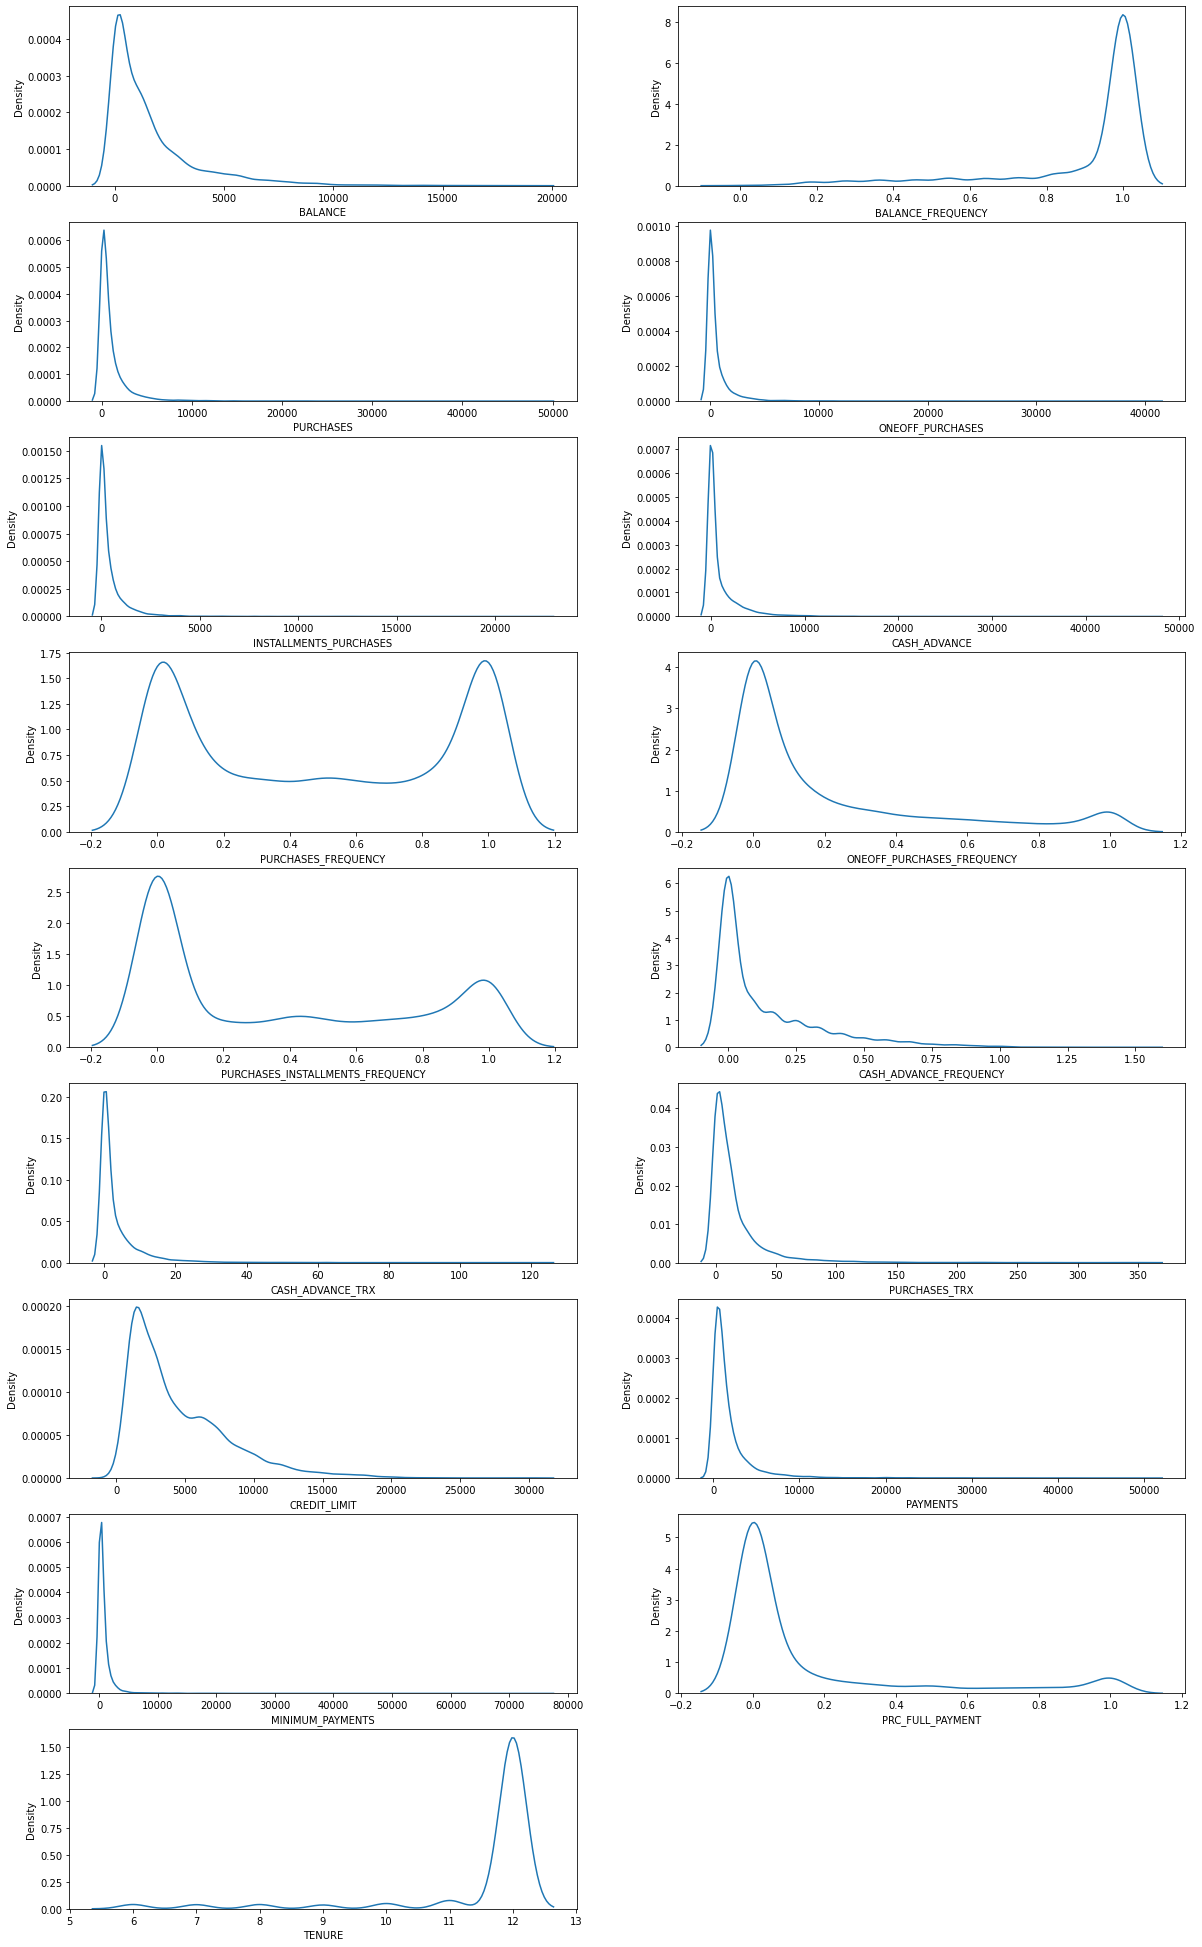

In [8]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df1.columns):
  if df1[col].dtype!='object':
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df1[col], ax=ax)
    plt.xlabel(col)

In [9]:
df1.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

To deal with the skewness of data in columns, we use Log Transformation.

In [10]:
for col in df1.columns:
    df1[col] = np.log(1 + df1[col])

Display the difference in distribution after log transformation

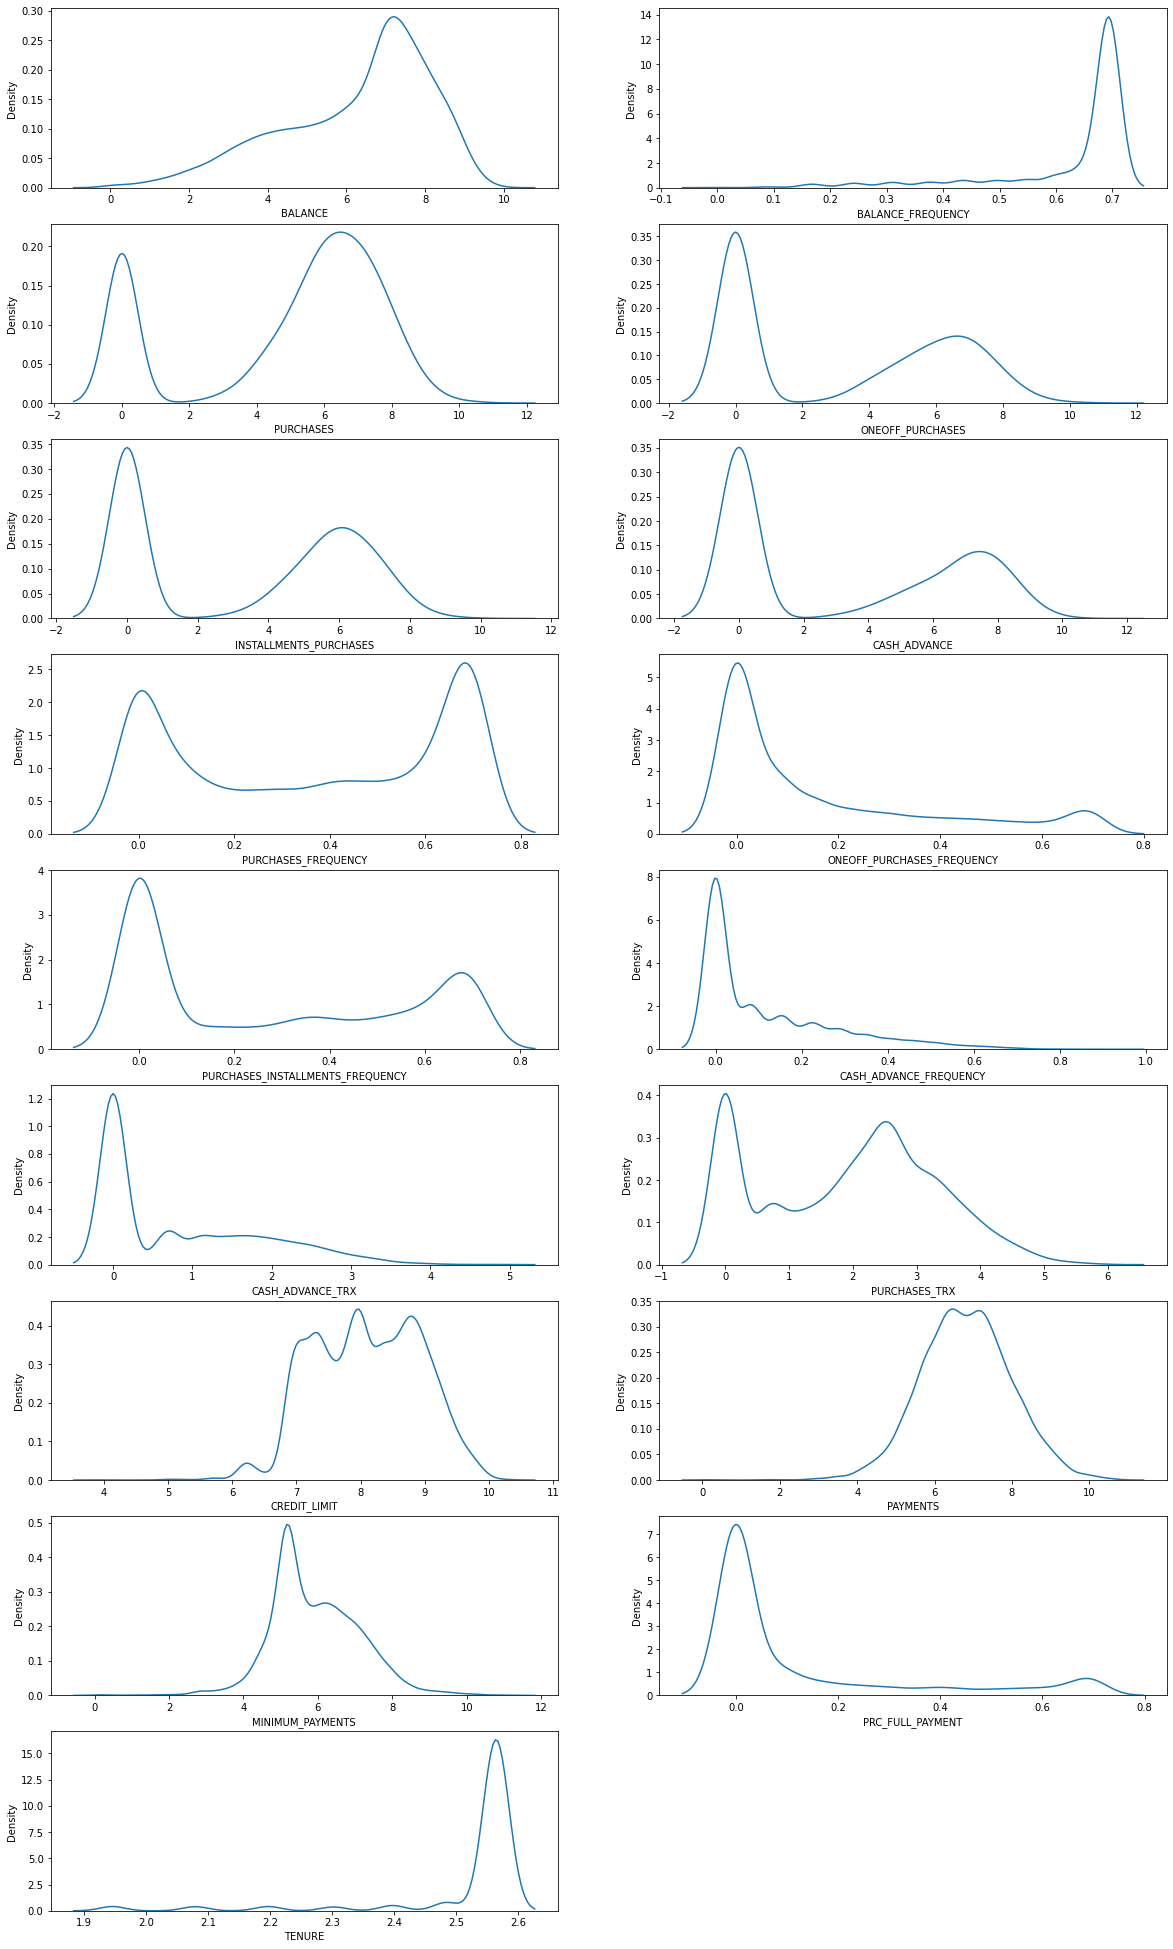

In [11]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df1.columns):
  if df1[col].dtype!='object':
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df1[col], ax=ax)
    plt.xlabel(col)

Then we look at the dataset's features to see the correlation between them.

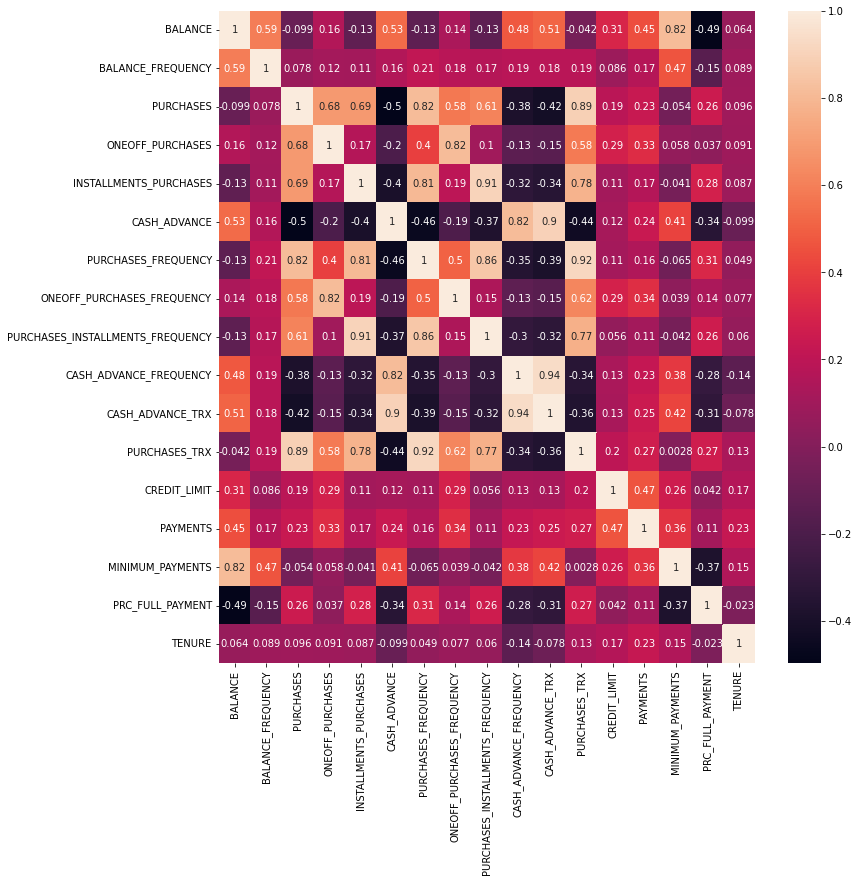

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), annot=True)
plt.show()

To get the most significant components, we use PCA as a dimensionality reduction method.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
Res_PCA = pca.fit_transform(df1)
df_PCA = pd.DataFrame(Res_PCA, columns = ['Comp1','Comp2','Comp3','Comp4','Comp5'])
df_PCA.head(10)

Comp1     Comp2     Comp3     Comp4     Comp5
0  0.995208 -5.729093  0.598730  0.526043  0.674032
1 -9.015723  1.293468  0.858426 -0.879599 -1.484887
2  2.589857  1.240795 -5.040086 -2.434489  0.921386
3 -1.262858 -2.881455 -3.916192 -2.154545 -0.108838
4  3.358507 -2.725612  3.879279 -3.236283  1.078897
5  8.185076  2.760389 -0.932128 -0.269855 -1.975570
6  2.437408 -3.302516  2.812188 -2.667473  0.874665
7  4.879882  0.481023 -1.272693 -1.222344 -0.500349
8  3.149352  0.289802 -5.905517  0.387657 -0.351562
9  3.127430 -2.996327  3.562062 -2.942204  1.257468

Now, we have two approaches to cluster the data:

1- Perform embedding using TSNE Algorithm, then cluster the result from TSNE using any of the clustering algorithms.

2- Perform clustering for the data in high dimension which is not suitable for some algorithms then embedding the data using TSNE and visualize the clustering result using labels we have got before applying TSNE.

Now, we will try each of the twwo approaches and see which one will give better clusters

Use TSNE Algorithm fior embedding (Moving from high-dimension space to Low-dimension one)

In [14]:
from sklearn.manifold import TSNE

tsne_projection = TSNE(n_components=2, 
                       perplexity=50,
                       n_iter=10**4,
                       early_exaggeration = 12, 
                       init='random',
                       random_state=42).fit_transform(df_PCA)
tsne_projection = pd.DataFrame(tsne_projection)
tsne_projection

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



0           1
0      -4.745625   70.226395
1     -16.447399  -65.088600
2     -86.930405   45.699135
3     -64.517990   39.230534
4      26.325256  110.986565
...          ...         ...
8631  -78.070419   -1.220047
8632  -13.273992   84.123604
8633   -9.729201   73.058067
8634  -53.815201  -30.343117
8635 -117.637352  -32.528912

[8636 rows x 2 columns]

## **First Approach:** Cluster result of TSNE using all clustering algorithms

## **KMeansClustering Algorithm**

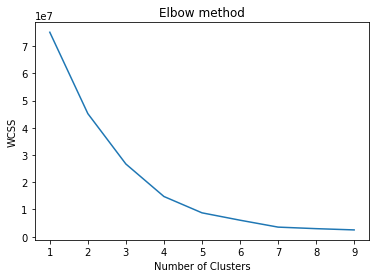

In [15]:
from sklearn.cluster import KMeans

#Use Elbow mwethod to check the best number of clusters
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(tsne_projection) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]
plt.plot(range (1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From Elbow method if we choose 5 number of clusters

In [16]:
choosed_model = KMeans(n_clusters=5, random_state=42).fit(tsne_projection)
choosed_model.labels_

array([0, 1, 2, ..., 0, 1, 2], dtype=int32)

In [17]:
cluster_labels = ["cluster" + str(label) 
                 for label in choosed_model.labels_]

In [18]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

We will try different number of clusters to get the best one using silhouette_score as the metric that measures the accuracy of clustering

In [19]:
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,10))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = cluster_model.fit(tsne_projection).labels_
    
    silhouette_avg = silhouette_score(tsne_projection, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

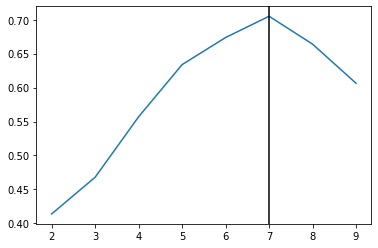

In [20]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [21]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

In [22]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

## **AgglomerativeClustering**

Choose number of clusters that give the best silhouette_score

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,15))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = cluster_model.fit_predict(tsne_projection)
    
    silhouette_avg = silhouette_score(tsne_projection, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

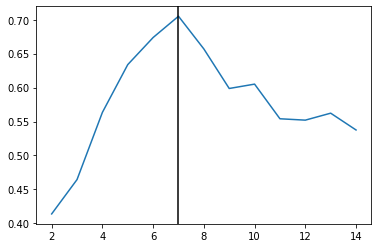

In [24]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [25]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

In [26]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

# **DBSCAN**

Here we will detect anomalies through this algorithm for result of TSNE

In [27]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 3.5, min_samples = 5).fit(tsne_projection)
labels = db_default.labels_

In [28]:
cluster_labels = ["cluster (" + str(label) + ")" 
                 for label in labels]

In [29]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

Only one point is detected as anomaly

# **Expectation-Maximization (EM) Algorithm**

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,15))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = GaussianMixture(n_components = n_clusters)
    cluster_labels = cluster_model.fit_predict(tsne_projection)
    
    silhouette_avg = silhouette_score(tsne_projection, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model
        labels = cluster_labels 

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_components, color='black')

In [ ]:
cluster_labels = ["cluster (" + str(label) + ")" 
                 for label in labels]

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

# **Isolated Random Forest**



In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100, contamination=0.1, max_features=0.7)
labels = model.fit_predict(tsne_projection)

In [ ]:
cluster_labels = ["cluster (" + str(label) + ")" 
                 for label in labels]

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

# **Second Approach:** Cluster the result of PCA first then use TSNE with labels we have obtained from this clustering

## **KMeansClustering Algorithm**

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,10))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = cluster_model.fit(df_PCA).labels_
    
    silhouette_avg = silhouette_score(df_PCA, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [ ]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

Here we can see that KMeans has better performance in clustering with first approach. 

## **AgglomerativeClustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,15))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = cluster_model.fit_predict(df_PCA)
    
    silhouette_avg = silhouette_score(df_PCA, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [ ]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

There is no big difference between two approaches here with this algorithm

# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 1.2, min_samples = 5).fit(df_PCA)
labels = db_default.labels_

In [ ]:
cluster_labels = ["cluster (" + str(label) + ")" 
                 for label in labels]


In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

In this approach, the number of anomalies is increased remarkably.

# **Expectation-Maximization (EM) Algorithm**

In [ ]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df_PCA)
xs = pd.DataFrame(scaled_data, columns = df_PCA.columns)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,15))
silhoutte_score = []
best_cluster_model = None 

In [ ]:
for n_clusters in range_n_cluster:
    cluster_model  = GaussianMixture(n_components = n_clusters)
    cluster_labels = cluster_model.fit_predict(xs)
    
    silhouette_avg = silhouette_score(xs, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model
        labels = cluster_labels 


plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_components, color='black')


In [ ]:
cluster_labels = ["cluster (" + str(label) + ")" 
                 for label in labels]

import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

From the clustering above, I can see that the first approach is better than this one.

# **Isolated Random Forest**



In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100, contamination=0.1, max_features=0.7)
labels = model.fit_predict(df_PCA)

In [ ]:
cluster_labels = ["cluster (" + str(label) + ")" 
                 for label in labels]

import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

I can't decide here which one is better in anomaly detection but may be it depends on the application in which we use this algorithm

I found this link while I was searching in that area https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne

# **Try Different preprocessing (Use Kernel PCA instead of PCA)**

This Will be in  a separate notebook with name  "Credit Card Clustering + Kernel PCA.ipynb"

# **Try Another preprocessing**

We will use only one algorithm "KMeans" for clustering in the following part.

1- Remove nulls

2- Drop CUST_ID column

In [ ]:
df2 = df.copy()
df2.dropna(inplace=True)
df2.drop('CUST_ID', axis=1, inplace=True)

2- Robust Scaler which is suitable for dataserts with skewed distributions and outliers because it transforms the data based on the median and quantile

In [ ]:
from sklearn.preprocessing import RobustScaler
model = RobustScaler()
df2 = pd.DataFrame(model.fit_transform(df2), columns = df2.columns)

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df2.columns):
  if df2[col].dtype!='object':
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df2[col], ax=ax)
    plt.xlabel(col)

In [ ]:
from sklearn.manifold import TSNE

tsne_projection2 = TSNE(n_components=2, 
                       perplexity=50,
                       n_iter=10**4,
                       early_exaggeration = 12, 
                       init='random',
                       random_state=42).fit_transform(df2)
tsne_projection2 = pd.DataFrame(tsne_projection2)
tsne_projection2

## **KMeansClustering Algorithm**

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,10))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = cluster_model.fit(df2).labels_
    
    silhouette_avg = silhouette_score(df2, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [ ]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

With only Robust scaling Data is not well clustered so let's try robust + pca

**Robust Scaling + PCA**

In [ ]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=0.95)
Res_PCA2 = pca2.fit_transform(df2)
df2_PCA = pd.DataFrame(Res_PCA2)
df2_PCA.head(10)

In [ ]:
from sklearn.manifold import TSNE

tsne_projection2 = TSNE(n_components=2, 
                       perplexity=50,
                       n_iter=10**4,
                       early_exaggeration = 12, 
                       init='random',
                       random_state=42).fit_transform(df2_PCA)
tsne_projection2 = pd.DataFrame(tsne_projection2)
tsne_projection2

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,10))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = cluster_model.fit(df2_PCA).labels_
    
    silhouette_avg = silhouette_score(df2_PCA, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [ ]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

import plotly.express as px
fig = px.scatter(x=tsne_projection2[0], 
                 y=tsne_projection2[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

This preprocessing failed to cluster the data well.

Robust Scaler + Log Transformation + PCA

In [ ]:
df2 = df.copy()
df2.dropna(inplace=True)
df2.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
for col in df2.columns:
  df2[col] = np.log1p(df2[col])

In [ ]:
from sklearn.preprocessing import RobustScaler
model = RobustScaler()
df_scaled = pd.DataFrame(model.fit_transform(df2), columns = df2.columns)

In [ ]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=0.95)
Res_PCA2 = pca2.fit_transform(df_scaled)
df2_PCA = pd.DataFrame(Res_PCA2)
df2_PCA.head(10)

In [ ]:
from sklearn.manifold import TSNE

tsne_projection2 = TSNE(n_components=2, 
                       perplexity=50,
                       n_iter=10**4,
                       early_exaggeration = 12, 
                       init='random',
                       random_state=42).fit_transform(df2_PCA)
tsne_projection2 = pd.DataFrame(tsne_projection2)
tsne_projection2

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [ ]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

import plotly.express as px
fig = px.scatter(x=tsne_projection2[0], 
                 y=tsne_projection2[1], 
                 text=tsne_projection2.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

# **Try Another Preprocessing**

Standard scaler + PCA

In [ ]:
df3 = df.copy()
df3.dropna(inplace=True)
df3.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df3)
df_scaled = pd.DataFrame(scaled_data, columns = df3.columns)

In [ ]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components=0.95)
Res_PCA3 = pca2.fit_transform(df_scaled)
df3_PCA = pd.DataFrame(Res_PCA3)
df3_PCA.head(10)

TSNE projection of df3_PCA

In [ ]:
from sklearn.manifold import TSNE

tsne_projection3 = TSNE(n_components=2, 
                       perplexity=50,
                       n_iter=10**4,
                       early_exaggeration = 12, 
                       init='random',
                       random_state=42).fit_transform(df3_PCA)
tsne_projection3 = pd.DataFrame(tsne_projection3)
tsne_projection3

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,10))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = cluster_model.fit(df3_PCA).labels_
    
    silhouette_avg = silhouette_score(df3_PCA, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [ ]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

import plotly.express as px
fig = px.scatter(x=tsne_projection3[0], 
                 y=tsne_projection3[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

Also here the data is not well clustered

Log Transformation + Standard Scaler + PCA

In [ ]:
df3 = df.copy()
df3.dropna(inplace=True)
df3.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
for col in df3.columns:
  df3[col] = np.log1p(df3[col])

In [ ]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df3)
df_scaled = pd.DataFrame(scaled_data, columns = df3.columns)

In [ ]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components=0.95)
Res_PCA3 = pca2.fit_transform(df_scaled)
df3_PCA = pd.DataFrame(Res_PCA3)
df3_PCA.head(10)

In [ ]:
from sklearn.manifold import TSNE
tsne_projection3 = TSNE(n_components=2, 
                       perplexity=50,
                       n_iter=10**4,
                       early_exaggeration = 12, 
                       init='random',
                       random_state=42).fit_transform(df3_PCA)
tsne_projection3 = pd.DataFrame(tsne_projection3)
tsne_projection3

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,10))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = cluster_model.fit(df3_PCA).labels_
    
    silhouette_avg = silhouette_score(df3_PCA, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [ ]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

import plotly.express as px
fig = px.scatter(x=tsne_projection3[0], 
                 y=tsne_projection3[1], 
                 text=tsne_projection3.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

Bad performance also with this mixture of preprocessing + KMeans

I find that the best choice in this notebook is for Log Transformation after removing rows with null + PCA